# 线性回归及其应用：从理论到实践

## Spotify 数据集案例分析


## 1. 数据准备与探索性分析

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和绘图风格
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("环境准备完成！")

环境准备完成！


In [49]:
# 加载数据
df = pd.read_csv('spotify_dataset.csv')

# 数据基本信息
print("数据集形状:", df.shape)
print("\n前5行数据:")
print(df.head())

print("\n数据类型和缺失值:")
print(df.info())

数据集形状: (114000, 21)

前5行数据:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          5

In [50]:
print("\n" + "="*50)
print("为了更好的可视化效果，随机采样400条数据")
print("="*50)
df = df.sample(n=400, random_state=42).reset_index(drop=True)
print(f"采样后数据集形状: {df.shape}")


为了更好的可视化效果，随机采样400条数据
采样后数据集形状: (400, 21)


## 2. 简单线性回归 (SLR)

### 2.1 显著案例：Loudness vs Energy

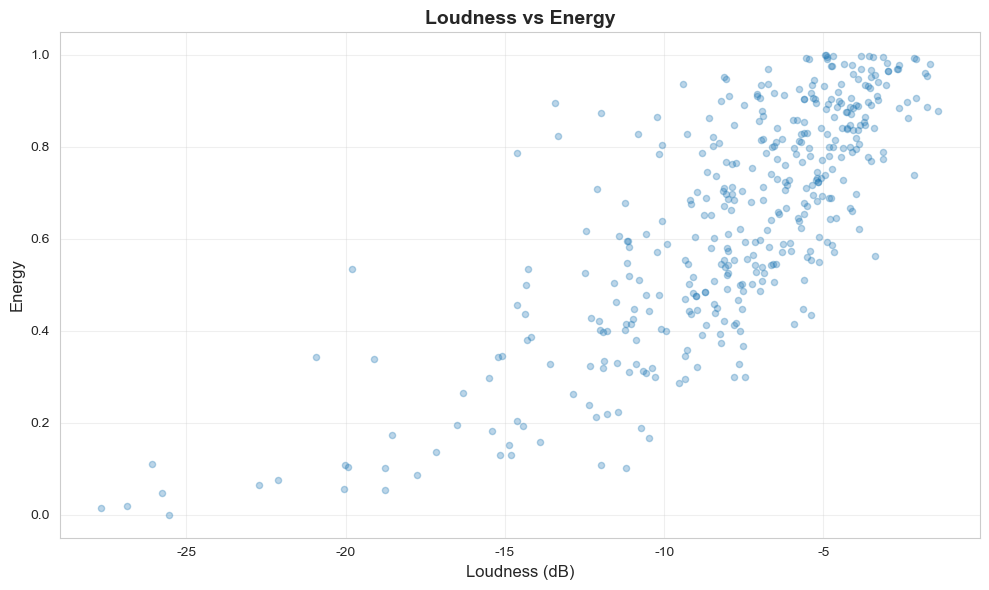

Pearson相关系数: 0.7743
p-value: 4.0491e-81


In [51]:
# 散点图：loudness vs energy（显著关系）
plt.figure(figsize=(10, 6))
plt.scatter(df['loudness'], df['energy'], alpha=0.3, s=20)
plt.xlabel('Loudness (dB)', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.title('Loudness vs Energy', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig('spotify_scatter_loudness_energy.png', dpi=150, bbox_inches='tight')
plt.show()

# 计算相关系数
corr, p_value = stats.pearsonr(df['loudness'], df['energy'])
print(f"Pearson相关系数: {corr:.4f}")
print(f"p-value: {p_value:.4e}")

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 准备数据
X = df[['loudness']]
y = df['energy']

# 划分训练集和测试集 (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")

训练集大小: 320
测试集大小: 80


In [55]:
# 训练简单线性回归模型
model_slr = LinearRegression()
model_slr.fit(X_train, y_train)

# 查看参数
print("="*50)
print("简单线性回归模型参数 (Loudness → Energy)")
print("="*50)
print(f"截距 (β₀): {model_slr.intercept_:.4f}")
print(f"斜率 (β₁): {model_slr.coef_[0]:.4f}")
print(f"\n模型方程: Energy = {model_slr.intercept_:.4f} + {model_slr.coef_[0]:.4f} × Loudness")
print("\n解释: Loudness每增加1 dB，Energy平均增加 {:.4f}".format(model_slr.coef_[0]))

简单线性回归模型参数 (Loudness → Energy)
截距 (β₀): 0.9832
斜率 (β₁): 0.0428

模型方程: Energy = 0.9832 + 0.0428 × Loudness

解释: Loudness每增加1 dB，Energy平均增加 0.0428


In [56]:
# 模型预测
y_pred_train = model_slr.predict(X_train)
y_pred_test = model_slr.predict(X_test)

# 计算评估指标
print("="*50)
print("模型评估指标")
print("="*50)
print("\n训练集:")
print(f"  MSE:  {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"  R²:   {r2_score(y_train, y_pred_train):.4f}")

print("\n测试集:")
print(f"  MSE:  {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"  R²:   {r2_score(y_test, y_pred_test):.4f}")

print("\n✓ 训练集和测试集R²接近，说明模型泛化良好")

模型评估指标

训练集:
  MSE:  0.0242
  RMSE: 0.1555
  MAE:  0.1282
  R²:   0.5962

测试集:
  MSE:  0.0238
  RMSE: 0.1543
  MAE:  0.1221
  R²:   0.6058

✓ 训练集和测试集R²接近，说明模型泛化良好


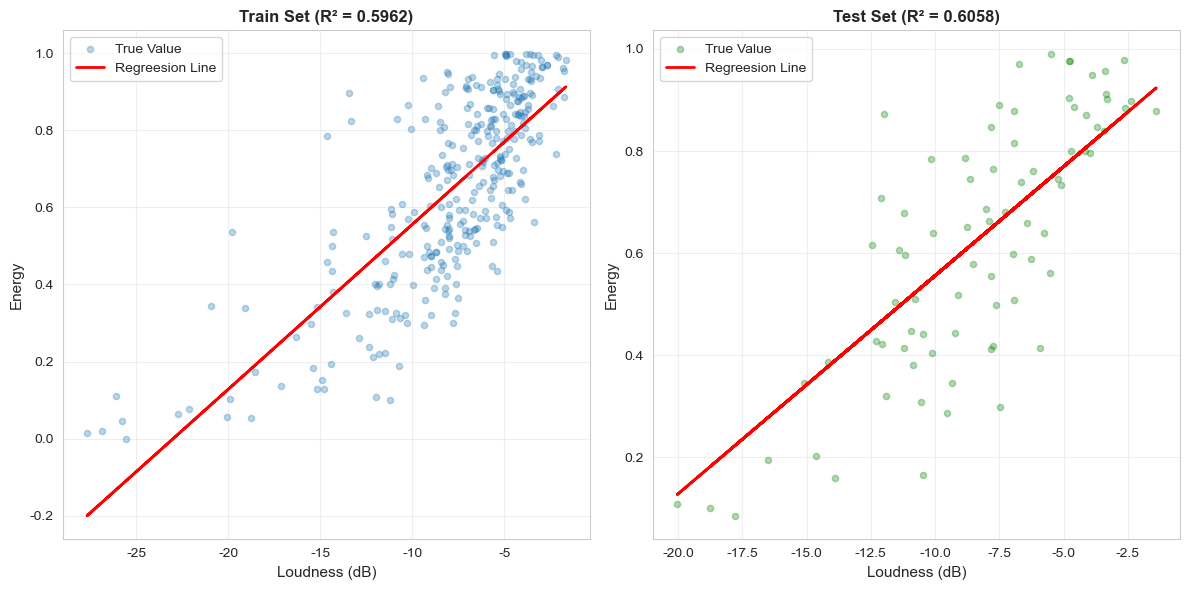

In [57]:
# 可视化回归线
plt.figure(figsize=(12, 6))

# 训练集
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.3, s=20, label='True Value')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regreesion Line')
plt.xlabel('Loudness (dB)', fontsize=11)
plt.ylabel('Energy', fontsize=11)
plt.title(f'Train Set (R² = {r2_score(y_train, y_pred_train):.4f})', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 测试集
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.3, s=20, label='True Value', color='green')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Regreesion Line')
plt.xlabel('Loudness (dB)', fontsize=11)
plt.ylabel('Energy', fontsize=11)
plt.title(f'Test Set (R² = {r2_score(y_test, y_pred_test):.4f})', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('slr_regression_line.png', dpi=150, bbox_inches='tight')
plt.show()

### 2.2 使用 statsmodels 进行统计推断

In [58]:
import statsmodels.api as sm

# statsmodels 需要手动添加常数项
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# 训练OLS模型
model_sm = sm.OLS(y_train, X_train_sm).fit()

# 详细统计报告
print("="*70)
print("Statsmodels OLS 回归详细报告")
print("="*70)
print(model_sm.summary())

Statsmodels OLS 回归详细报告
                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     469.5
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           1.39e-64
Time:                        13:53:35   Log-Likelihood:                 141.46
No. Observations:                 320   AIC:                            -278.9
Df Residuals:                     318   BIC:                            -271.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9832      0.

In [59]:
# 提取关键统计信息
print("\n" + "="*50)
print("关键统计量解读")
print("="*50)

# 系数和置信区间
conf_int = model_sm.conf_int()
print("\n系数估计和95%置信区间:")
for i, name in enumerate(['截距', 'loudness']):
    coef = model_sm.params[i]
    ci_low = conf_int.iloc[i, 0]
    ci_high = conf_int.iloc[i, 1]
    p_val = model_sm.pvalues[i]
    t_stat = model_sm.tvalues[i]
    
    sig = '***' if p_val < 0.001 else ('**' if p_val < 0.01 else ('*' if p_val < 0.05 else ''))
    
    print(f"\n  {name}:")
    print(f"    系数: {coef:.6f} {sig}")
    print(f"    t统计量: {t_stat:.4f}")
    print(f"    p-value: {p_val:.4e}")
    print(f"    95% CI: [{ci_low:.6f}, {ci_high:.6f}]")

print("\n模型整体:")
print(f"  R²: {model_sm.rsquared:.4f}")
print(f"  Adjusted R²: {model_sm.rsquared_adj:.4f}")
print(f"  F-statistic: {model_sm.fvalue:.2f}")
print(f"  F-test p-value: {model_sm.f_pvalue:.4e}")

print("\n" + "="*50)
print("结论: loudness对energy有高度显著的正向影响 (p < 0.001)")
print("="*50)


关键统计量解读

系数估计和95%置信区间:

  截距:
    系数: 0.983247 ***
    t统计量: 55.7192
    p-value: 3.9282e-166
    95% CI: [0.948528, 1.017965]

  loudness:
    系数: 0.042754 ***
    t统计量: 21.6681
    p-value: 1.3903e-64
    95% CI: [0.038872, 0.046636]

模型整体:
  R²: 0.5962
  Adjusted R²: 0.5949
  F-statistic: 469.51
  F-test p-value: 1.3903e-64

结论: loudness对energy有高度显著的正向影响 (p < 0.001)


### 2.3 不显著案例：Danceability vs Energy

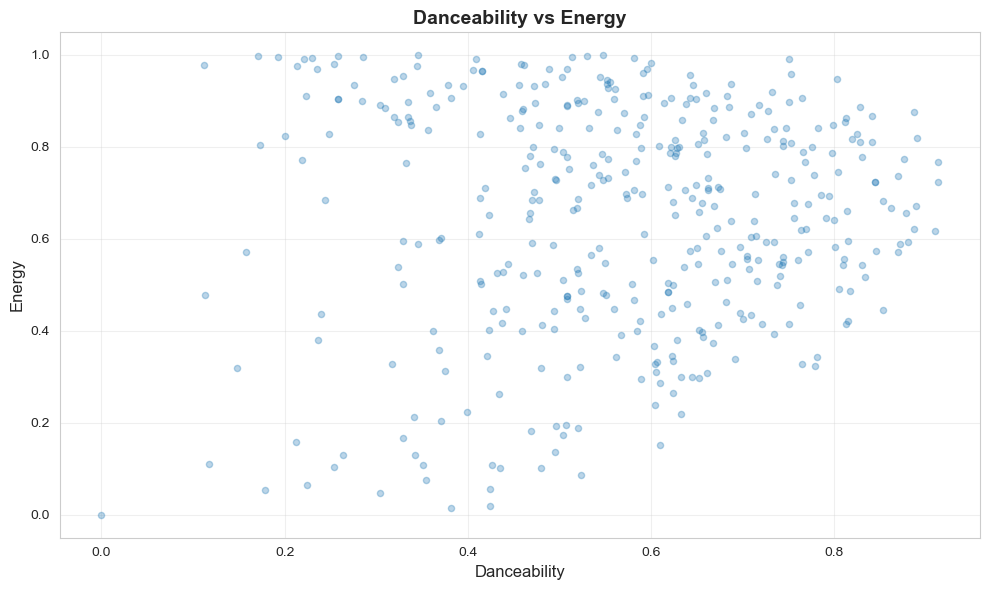

Pearson相关系数: 0.0640
p-value: 2.0148e-01

观察：相关性很弱，散点图显示无明显线性关系


In [63]:
# 散点图：danceability vs energy（弱关系）
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], alpha=0.3, s=20)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.title('Danceability vs Energy', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('spotify_scatter_danceability_energy.png', dpi=150, bbox_inches='tight')
plt.show()

# 计算相关系数
corr_dance, p_dance = stats.pearsonr(df['danceability'], df['energy'])
print(f"Pearson相关系数: {corr_dance:.4f}")
print(f"p-value: {p_dance:.4e}")
print("\n观察：相关性很弱，散点图显示无明显线性关系")

In [25]:
# 建立回归模型
X_dance = df[['danceability']]
y_dance = df['energy']

X_dance_train, X_dance_test, y_dance_train, y_dance_test = train_test_split(
    X_dance, y_dance, test_size=0.2, random_state=42
)

model_dance = LinearRegression()
model_dance.fit(X_dance_train, y_dance_train)

print("="*50)
print("简单线性回归模型参数 (Danceability → Energy)")
print("="*50)
print(f"截距 (β₀): {model_dance.intercept_:.4f}")
print(f"斜率 (β₁): {model_dance.coef_[0]:.4f}")

# 评估
y_dance_pred_train = model_dance.predict(X_dance_train)
y_dance_pred_test = model_dance.predict(X_dance_test)

print("\n测试集 R²:", r2_score(y_dance_test, y_dance_pred_test))
print("\n⚠ 注意：R²非常低，说明danceability对energy的预测能力很弱")

简单线性回归模型参数 (Danceability → Energy)
截距 (β₀): 0.6351
斜率 (β₁): 0.0116

测试集 R²: -0.03460870236000457

⚠ 注意：R²非常低，说明danceability对energy的预测能力很弱


In [64]:
# 统计显著性检验
X_dance_train_sm = sm.add_constant(X_dance_train)
model_dance_sm = sm.OLS(y_dance_train, X_dance_train_sm).fit()

print("\nStatsmodels 简要报告:")
print(model_dance_sm.summary())

print("\n" + "="*50)
print("关键发现:")
print("="*50)
print(f"danceability 系数: {model_dance_sm.params[1]:.6f}")
print(f"p-value: {model_dance_sm.pvalues[1]:.4f}")

if model_dance_sm.pvalues[1] >= 0.05:
    print("\n结论: danceability对energy的影响不显著 (p >= 0.05)")
    print("这说明即使有统计关系，也可能不具有实际意义")
else:
    print("\n虽然统计显著，但R²极低，实际预测能力有限")


Statsmodels 简要报告:
                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01597
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.900
Time:                        14:24:25   Log-Likelihood:                -4.3958
No. Observations:                 240   AIC:                             12.79
Df Residuals:                     238   BIC:                             19.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6351      

### 2.4 残差分析

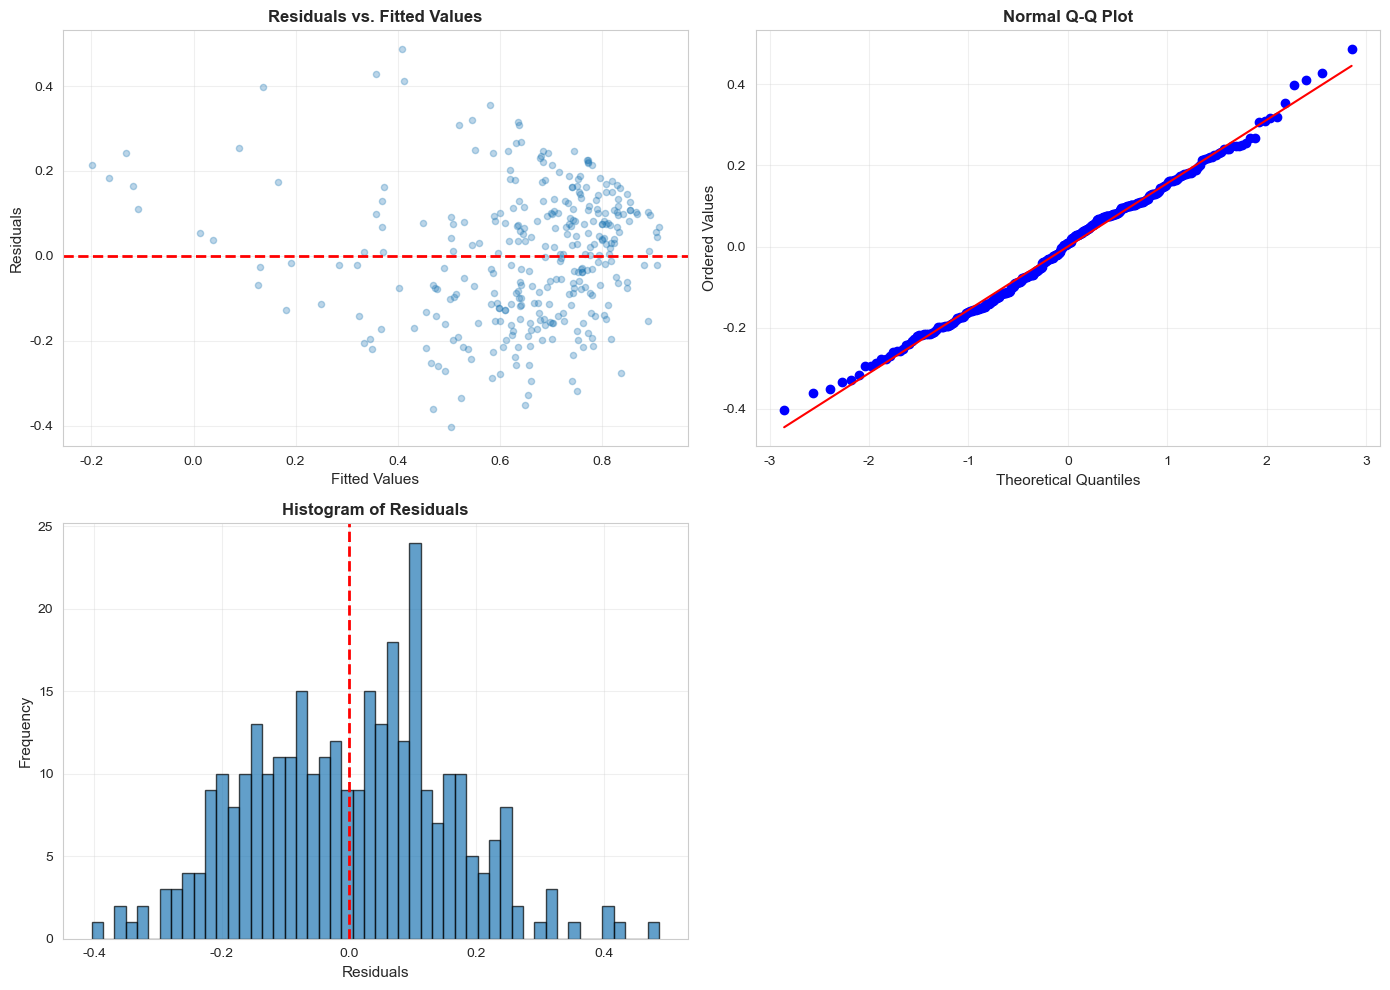

Residual diagnostic plots (3 plots) saved.


In [67]:
# 计算残差 (Calculate residuals)
residuals = y_train - y_pred_train

# 创建一个 2x2 的网格，但我们只使用其中三个
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 残差 vs 拟合值 (Residuals vs Fitted)
# 位置: [0, 0] (左上)
axes[0, 0].scatter(y_pred_train, residuals, alpha=0.3, s=20)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Residuals vs. Fitted Values', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q 图 (Q-Q Plot)
# 位置: [0, 1] (右上)
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Theoretical Quantiles', fontsize=11)
axes[0, 1].set_ylabel('Ordered Values', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# 3. 残差直方图 (Histogram of Residuals)
# 位置: [1, 0] (左下)
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Histogram of Residuals', fontsize=12, fontweight='bold')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3)

# 4. 隐藏未使用的子图
# 位置: [1, 1] (右下)
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('residual_diagnostics_3plots.png', dpi=150, bbox_inches='tight')
plt.show()

print("Residual diagnostic plots (3 plots) saved.")

## 3. 多元线性回归 (MLR)

In [68]:
# 选择多个特征
features_mlr = ['loudness', 'acousticness', 'tempo', 'valence']
X_mlr = df[features_mlr]
y_mlr = df['energy']

# 划分数据集
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(
    X_mlr, y_mlr, test_size=0.2, random_state=42
)

# 训练多元回归模型
model_mlr = LinearRegression()
model_mlr.fit(X_mlr_train, y_mlr_train)

print("="*50)
print("多元线性回归模型")
print("="*50)
print(f"\n截距: {model_mlr.intercept_:.4f}")
print("\n各特征系数:")
for feat, coef in zip(features_mlr, model_mlr.coef_):
    print(f"  {feat:15s}: {coef:8.4f}")

多元线性回归模型

截距: 0.8578

各特征系数:
  loudness       :   0.0274
  acousticness   :  -0.3318
  tempo          :   0.0008
  valence        :   0.0303


In [69]:
# 评估多元回归模型
y_mlr_pred_train = model_mlr.predict(X_mlr_train)
y_mlr_pred_test = model_mlr.predict(X_mlr_test)

print("="*50)
print("多元回归模型评估")
print("="*50)

print("\n训练集:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_mlr_train, y_mlr_pred_train)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_mlr_train, y_mlr_pred_train):.4f}")
print(f"  R²:   {r2_score(y_mlr_train, y_mlr_pred_train):.4f}")

print("\n测试集:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_mlr_test, y_mlr_pred_test)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_mlr_test, y_mlr_pred_test):.4f}")
print(f"  R²:   {r2_score(y_mlr_test, y_mlr_pred_test):.4f}")

print("\n与简单回归对比:")
print(f"  SLR 测试集 R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"  MLR 测试集 R²: {r2_score(y_mlr_test, y_mlr_pred_test):.4f}")
print(f"  R² 提升: {(r2_score(y_mlr_test, y_mlr_pred_test) - r2_score(y_test, y_pred_test)):.4f}")

多元回归模型评估

训练集:
  RMSE: 0.1258
  MAE:  0.1019
  R²:   0.7356

测试集:
  RMSE: 0.1134
  MAE:  0.0914
  R²:   0.7871

与简单回归对比:
  SLR 测试集 R²: 0.6058
  MLR 测试集 R²: 0.7871
  R² 提升: 0.1812


In [70]:
# 使用statsmodels进行详细分析
X_mlr_train_sm = sm.add_constant(X_mlr_train)
model_mlr_sm = sm.OLS(y_mlr_train, X_mlr_train_sm).fit()

print("="*70)
print("多元回归详细统计报告")
print("="*70)
print(model_mlr_sm.summary())

多元回归详细统计报告
                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           1.19e-89
Time:                        14:49:21   Log-Likelihood:                 209.21
No. Observations:                 320   AIC:                            -408.4
Df Residuals:                     315   BIC:                            -389.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8578      0.041   

## 3. 交叉验证

In [73]:
from sklearn.model_selection import cross_val_score, KFold

# K折交叉验证
cv_folds = 5
kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

# 简单回归交叉验证
cv_scores_slr = cross_val_score(
    LinearRegression(), X_train, y_train, 
    cv=kfold, scoring='r2'
)

# 多元回归交叉验证
cv_scores_mlr = cross_val_score(
    LinearRegression(), X_mlr_train, y_mlr_train,
    cv=kfold, scoring='r2'
)

print("="*50)
print(f"{cv_folds}折交叉验证结果")
print("="*50)

print("\n简单线性回归 (Loudness → Energy):")
print(f"  各折 R²: {cv_scores_slr}")
print(f"  平均 R²: {cv_scores_slr.mean():.4f} (± {cv_scores_slr.std():.4f})")

print("\n多元线性回归:")
print(f"  各折 R²: {cv_scores_mlr}")
print(f"  平均 R²: {cv_scores_mlr.mean():.4f} (± {cv_scores_mlr.std():.4f})")

print("\n✓ 交叉验证可以更可靠地评估模型泛化性能")

5折交叉验证结果

简单线性回归 (Loudness → Energy):
  各折 R²: [0.55434475 0.59723438 0.71170709 0.44792715 0.50646987]
  平均 R²: 0.5635 (± 0.0892)

多元线性回归:
  各折 R²: [0.67435272 0.73312825 0.8157918  0.66778634 0.69330743]
  平均 R²: 0.7169 (± 0.0544)

✓ 交叉验证可以更可靠地评估模型泛化性能


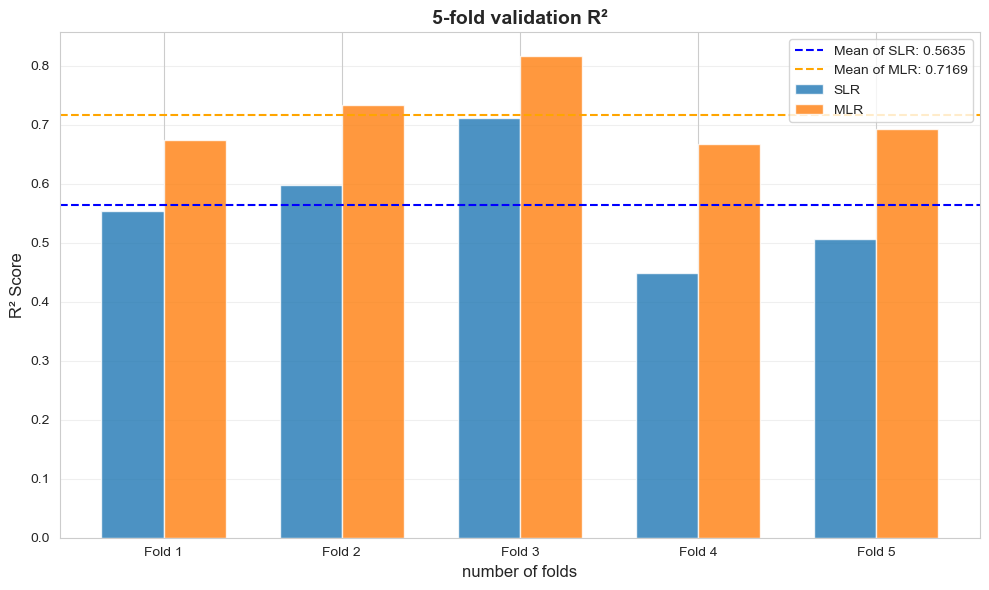

In [75]:
# 可视化交叉验证结果
plt.figure(figsize=(10, 6))

x_pos = np.arange(cv_folds)
width = 0.35

plt.bar(x_pos - width/2, cv_scores_slr, width, label='SLR', alpha=0.8)
plt.bar(x_pos + width/2, cv_scores_mlr, width, label='MLR', alpha=0.8)

plt.axhline(cv_scores_slr.mean(), color='blue', linestyle='--', 
            linewidth=1.5, label=f'Mean of SLR: {cv_scores_slr.mean():.4f}')
plt.axhline(cv_scores_mlr.mean(), color='orange', linestyle='--', 
            linewidth=1.5, label=f'Mean of MLR: {cv_scores_mlr.mean():.4f}')

plt.xlabel('number of folds', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title(f'{cv_folds}-fold validation R²', fontsize=14, fontweight='bold')
plt.xticks(x_pos, [f'Fold {i+1}' for i in range(cv_folds)])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('cross_validation_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. 正则化回归

### 4.1 Ridge 回归 (L2 正则化)

In [76]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 尝试不同的alpha值
alphas = np.logspace(-3, 3, 50)

# Ridge交叉验证
ridge_cv = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=5)
)

ridge_cv.fit(X_mlr_train, y_mlr_train)

best_alpha = ridge_cv.named_steps['ridgecv'].alpha_
ridge_coef = ridge_cv.named_steps['ridgecv'].coef_

print("="*50)
print("Ridge 回归 (L2 正则化)")
print("="*50)
print(f"\n最佳 alpha: {best_alpha:.4f}")

print("\n系数比较:")
print(f"{'特征':<15} {'OLS系数':>12} {'Ridge系数':>12} {'变化':>12}")
print("-" * 55)
for feat, ols_c, ridge_c in zip(features_mlr, model_mlr.coef_, ridge_coef):
    change = ridge_c - ols_c
    print(f"{feat:<15} {ols_c:>12.6f} {ridge_c:>12.6f} {change:>12.6f}")

# 评估
r2_ridge_train = ridge_cv.score(X_mlr_train, y_mlr_train)
r2_ridge_test = ridge_cv.score(X_mlr_test, y_mlr_test)

print("\n性能:")
print(f"  训练集 R²: {r2_ridge_train:.4f}")
print(f"  测试集 R²: {r2_ridge_test:.4f}")
print(f"\n对比 OLS 测试集 R²: {r2_score(y_mlr_test, y_mlr_pred_test):.4f}")

Ridge 回归 (L2 正则化)

最佳 alpha: 10.9854

系数比较:
特征                     OLS系数      Ridge系数           变化
-------------------------------------------------------
loudness            0.027441     0.118113     0.090672
acousticness       -0.331848    -0.105544     0.226303
tempo               0.000752     0.022202     0.021449
valence             0.030272     0.008260    -0.022012

性能:
  训练集 R²: 0.7353
  测试集 R²: 0.7863

对比 OLS 测试集 R²: 0.7871


### 5.2 Lasso 回归 (L1 正则化)

In [77]:
from sklearn.linear_model import LassoCV

# Lasso交叉验证
lasso_cv = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, max_iter=10000, random_state=42)
)

lasso_cv.fit(X_mlr_train, y_mlr_train)

best_alpha_lasso = lasso_cv.named_steps['lassocv'].alpha_
lasso_coef = lasso_cv.named_steps['lassocv'].coef_

print("="*50)
print("Lasso 回归 (L1 正则化)")
print("="*50)
print(f"\n最佳 alpha: {best_alpha_lasso:.4f}")

print("\n系数比较:")
print(f"{'特征':<15} {'OLS系数':>12} {'Lasso系数':>12} {'是否保留':>12}")
print("-" * 60)
for feat, ols_c, lasso_c in zip(features_mlr, model_mlr.coef_, lasso_coef):
    kept = '✓' if lasso_c != 0 else '✗'
    print(f"{feat:<15} {ols_c:>12.6f} {lasso_c:>12.6f} {kept:>12}")

# 保留的特征
selected_features = [feat for feat, coef in zip(features_mlr, lasso_coef) if coef != 0]
print(f"\n保留的特征数: {len(selected_features)}/{len(features_mlr)}")
print(f"保留的特征: {selected_features}")

# 评估
r2_lasso_train = lasso_cv.score(X_mlr_train, y_mlr_train)
r2_lasso_test = lasso_cv.score(X_mlr_test, y_mlr_test)

print("\n性能:")
print(f"  训练集 R²: {r2_lasso_train:.4f}")
print(f"  测试集 R²: {r2_lasso_test:.4f}")

Lasso 回归 (L1 正则化)

最佳 alpha: 0.0050

系数比较:
特征                     OLS系数      Lasso系数         是否保留
------------------------------------------------------------
loudness            0.027441     0.120414            ✓
acousticness       -0.331848    -0.103746            ✓
tempo               0.000752     0.017785            ✓
valence             0.030272     0.003104            ✓

保留的特征数: 4/4
保留的特征: ['loudness', 'acousticness', 'tempo', 'valence']

性能:
  训练集 R²: 0.7345
  测试集 R²: 0.7773


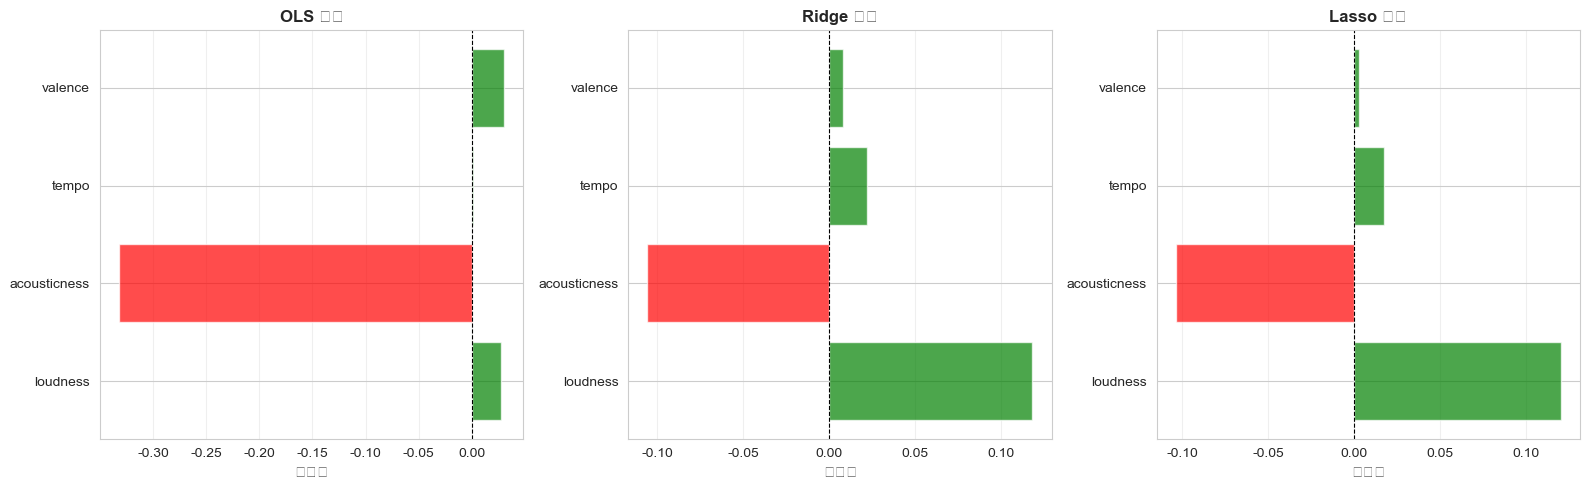

In [78]:
# 比较三种方法的系数
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

methods = ['OLS', 'Ridge', 'Lasso']
coefs = [model_mlr.coef_, ridge_coef, lasso_coef]

for ax, method, coef in zip(axes, methods, coefs):
    colors = ['red' if c < 0 else 'green' for c in coef]
    ax.barh(features_mlr, coef, color=colors, alpha=0.7)
    ax.set_xlabel('系数值', fontsize=11)
    ax.set_title(f'{method} 系数', fontsize=12, fontweight='bold')
    ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('regularization_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [79]:
# 模型性能综合比较
results = pd.DataFrame({
    'Model': ['OLS', 'Ridge', 'Lasso'],
    'Train R²': [
        r2_score(y_mlr_train, y_mlr_pred_train),
        r2_ridge_train,
        r2_lasso_train
    ],
    'Test R²': [
        r2_score(y_mlr_test, y_mlr_pred_test),
        r2_ridge_test,
        r2_lasso_test
    ],
    'Features': [
        len(features_mlr),
        len(features_mlr),
        len(selected_features)
    ]
})

results['Overfitting'] = results['Train R²'] - results['Test R²']

print("="*70)
print("模型综合比较")
print("="*70)
print(results.to_string(index=False))

print("\n关键观察:")
print("  • OLS: 无正则化，可能过拟合")
print("  • Ridge: 压缩系数但保留所有特征，减少过拟合")
print("  • Lasso: 特征选择，产生稀疏模型")

模型综合比较
Model  Train R²  Test R²  Features  Overfitting
  OLS  0.735597 0.787060         4    -0.051463
Ridge  0.735274 0.786284         4    -0.051010
Lasso  0.734480 0.777312         4    -0.042832

关键观察:
  • OLS: 无正则化，可能过拟合
  • Ridge: 压缩系数但保留所有特征，减少过拟合
  • Lasso: 特征选择，产生稀疏模型


## 5. 多项式回归与交互项

### 5.1 多项式特征

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# 创建多项式特征 (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

print("="*50)
print("多项式特征")
print("="*50)
print(f"原始特征数: {X_train.shape[1]}")
print(f"多项式特征数: {X_poly_train.shape[1]}")
print(f"\n生成的特征: {poly.get_feature_names_out()}")

# 使用Ridge避免过拟合
model_poly = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)
model_poly.fit(X_poly_train, y_train)

r2_poly_train = model_poly.score(X_poly_train, y_train)
r2_poly_test = model_poly.score(X_poly_test, y_test)

print("\n性能:")
print(f"  训练集 R²: {r2_poly_train:.4f}")
print(f"  测试集 R²: {r2_poly_test:.4f}")
print(f"\n对比线性模型测试集 R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"R² 提升: {r2_poly_test - r2_score(y_test, y_pred_test):.4f}")

多项式特征
原始特征数: 1
多项式特征数: 2

生成的特征: ['loudness' 'loudness^2']

性能:
  训练集 R²: 0.6238
  测试集 R²: 0.6135

对比线性模型测试集 R²: 0.6058
R² 提升: 0.0077


### 5.2 交互项

In [81]:
# 只添加交互项（不包括平方项）
poly_interact = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact_train = poly_interact.fit_transform(X_mlr_train)
X_interact_test = poly_interact.transform(X_mlr_test)

print("="*50)
print("交互项特征")
print("="*50)
print(f"原始特征数: {X_mlr_train.shape[1]}")
print(f"添加交互项后特征数: {X_interact_train.shape[1]}")
print(f"\n生成的特征: {poly_interact.get_feature_names_out()}")

# 使用Lasso进行特征选择
model_interact = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, max_iter=10000, random_state=42)
)
model_interact.fit(X_interact_train, y_mlr_train)

interact_coef = model_interact.named_steps['lassocv'].coef_
feature_names = poly_interact.get_feature_names_out()

# 保留的交互项
selected_interactions = [(name, coef) for name, coef in zip(feature_names, interact_coef) 
                         if coef != 0 and ' ' in name]

print(f"\n保留的交互项 ({len(selected_interactions)}):")
for name, coef in sorted(selected_interactions, key=lambda x: abs(x[1]), reverse=True):
    print(f"  {name:<30s}: {coef:8.4f}")

r2_interact_test = model_interact.score(X_interact_test, y_mlr_test)
print(f"\n测试集 R²: {r2_interact_test:.4f}")

交互项特征
原始特征数: 4
添加交互项后特征数: 10

生成的特征: ['loudness' 'acousticness' 'tempo' 'valence' 'loudness acousticness'
 'loudness tempo' 'loudness valence' 'acousticness tempo'
 'acousticness valence' 'tempo valence']

保留的交互项 (6):
  acousticness tempo            :  -0.1061
  acousticness valence          :   0.0855
  tempo valence                 :   0.0540
  loudness tempo                :  -0.0540
  loudness valence              :   0.0433
  loudness acousticness         :  -0.0354

测试集 R²: 0.7826


## 6. 总结与建议

In [83]:
# 最终模型比较总结
final_summary = pd.DataFrame({
    'Model': ['SLR (Loudness)', 'MLR (5 features)', 'Ridge', 'Lasso', 'Polynomial', 'Interaction'],
    'Features': [1, 5, 5, len(selected_features), 3, len([c for c in interact_coef if c != 0])],
    'Test R²': [
        r2_score(y_test, y_pred_test),
        r2_score(y_mlr_test, y_mlr_pred_test),
        r2_ridge_test,
        r2_lasso_test,
        r2_poly_test,
        r2_interact_test
    ]
})

final_summary = final_summary.sort_values('Test R²', ascending=False)

print("="*70)
print("最终模型性能总结")
print("="*70)
print(final_summary.to_string(index=False))

print("\n" + "="*70)
print("关键发现与建议")
print("="*70)
print("\n1. 特征重要性:")
print("   • Loudness 是预测 Energy 最重要的特征")
print("   • Acousticness 有显著的负相关")
print("   • Danceability 的预测能力较弱")

print("\n2. 模型选择:")
print("   • 简单场景：使用 SLR (Loudness) 即可获得不错效果")
print("   • 需要更高精度：使用 Ridge 或 MLR")
print("   • 需要特征选择：使用 Lasso")
print("   • 存在非线性：考虑多项式或交互项")

print("\n3. 实践建议:")
print("   ✓ 始终进行交叉验证")
print("   ✓ 标准化特征（特别是正则化时）")
print("   ✓ 检查多重共线性 (VIF)")
print("   ✓ 进行残差诊断")
print("   ✓ 防止数据泄露")
print("   ✓ 注意：相关性 ≠ 因果关系")

print("\n" + "="*70)

最终模型性能总结
           Model  Features  Test R²
MLR (5 features)         5 0.787060
           Ridge         5 0.786284
     Interaction        10 0.782579
           Lasso         4 0.777312
      Polynomial         3 0.613541
  SLR (Loudness)         1 0.605813

关键发现与建议

1. 特征重要性:
   • Loudness 是预测 Energy 最重要的特征
   • Acousticness 有显著的负相关
   • Danceability 的预测能力较弱

2. 模型选择:
   • 简单场景：使用 SLR (Loudness) 即可获得不错效果
   • 需要更高精度：使用 Ridge 或 MLR
   • 需要特征选择：使用 Lasso
   • 存在非线性：考虑多项式或交互项

3. 实践建议:
   ✓ 始终进行交叉验证
   ✓ 标准化特征（特别是正则化时）
   ✓ 检查多重共线性 (VIF)
   ✓ 进行残差诊断
   ✓ 防止数据泄露
   ✓ 注意：相关性 ≠ 因果关系

